<h1> Assignment 1</h1>
<ul>
<p>General Info:</p>
<ul>
    <li>**Hand-In Date**: 2nd October 2020</li>
    <li>**Hand-In Format**: as jupyter notebook (with all the cells executed!). The naming format shold be your studentId_Assignment1.filetype (pdf or ipynb).</li>
    <li>**Late Hand-In Penalty**: -10% of your points per late-day</li>  
    </ul>
<h2>Topics Covered: </h2>
<ul>
This lab covers the topics presented in the first three lecture groups, Introduction, Mathematical foundations and Classical optimization methods.<br />
Students attempting this lab should understand the mechanisms at work behind most classical solvers, have a decent understanding of problem spaces and start to get in touch with the Python 3.X framework and the Jupyter Notebook format. <br />
    This lab does require some minor programming proficiency in Python and some basic lin.alg understanding. You should understand functions, code modularity, be able to work with numpy or scipy and for the bonus points matplotlib or any other plotting libary. You should know how to approximate derivatives, what a hessian matrix is and what problems matrix inversion can raise. <br />

This lab specifically covers, in increasing difficulty: <br /> 
<ul>
    <li> Random Search (Task1)
    <li> Gradient Descend/First Order Methods (Task2)
    <li> Newtonian/Second Order Methods (Task3) 
</ul>
Each Task is performed on the same set of toy-problems outlined in Task0.
</ul>

<h3> Disclaimer! </h3>
The purpose of this assignment is also to motivate the topics covered in this course. Not all methods will be able to find all minima without some smart problem solving!!!

<h2>Marking Table: </h2>
<ul>
    There is a total of 99 points in this assignment. <br/>
    It is split in 3, equally weighted sections (Task 1-3). <br />
    Each of those sections contains: <br /><ul>
        <li> **Q1, 10 points** for explaining how the respective method works, analyzing what potential issues can arise when choosing to use this technique, and what advantages this technique can offer. To come about those points, please carefully consider how the technique would perform on the toy-problems in Task 0. Please be CONCISE with your explanation :-) <br />
        <li> **Q2, 10 points** for implementing the method in code. Points are awarded for code functionality AND readability. The code should be understandable on it's own. Please consider using a reasonable naming convention, code formatting and comments :-) <br/>
        <li> **Q3, 13 points** for testing the method on the toy-problems from Task 0. 2 Points per toy-problem the code was executed on. 5 for analyzing the respective method's behavior, comparing to what was expected and commenting on any findings. <br/>
        <li> **Additional 3 points** for plotting USEFUL convergence curves for each problem. This should encourage you to use helpful tools for debugging and analysis. THIS IS NOT STRICTLY REQUIRED TO REACH FULL MARKS! But I assume a reasonable a posteriori analysis to be based on some interpretable data... <br/>
    </ul>
In summary you can reach 33 points without programming. <br/>
Expect Task 1 to be easier than Task 2, which is again easier than Task 3. Plan your time accordingly!
    </ul>
    
<h2>Python Help: </h2>
<ul>
This lab requires a plotting library and numpy, as well as a working jupyter notebook and Python 3.X base (obviously). To install both modules, use the pip (or pip3) command. <br />
    A generally helpful site for ALL programming questions is stackoverflow. Any questions not specifically answered in this document are likely too specific (OR your TA did not think of them) and should probably be looked up there first. In general, Google is the software engineer's multi-tool and you should all be proficient at using it as such. <br/>
    Afterwards, if the question still persists: <br/>
    Either email your TA and wait for an answer (it can take some time since the TA will be basically redoing the same steps you, hopefully, did). **OR BETTER** get proactive and if you really do not manage to find anything after proper reflection and search then feel free to explain where you looked, what your problem is and your TA might be able to answer faster due to understanding your problem better and not having to retrace your search path as well :-)
    </ul>
    


<h2> Task 0, Preparation </h2>
<ul>
    <li> Run the following cell to define the four toy-problems you will be dealing with.
    <li> Then feel free to run the second following cell to plot the surfaces of all 4 functions, you  might find those plots helpful. 
    <li> Take a second to consider those functions and what the problematic properties of those are.
</ul>

Each function takes two inputs, x and y. For convenience, x and y have to be either **BOTH** one dimensional vectors and the output will be a corresponding grid, or points and the output will be a single point. So x=[1,2,3], y=[1,2,3,4] will work, as well as x=1, y=1, but **not** x=[1,2,3] and y=1. 


In [1]:
import numpy as np # importing numpy as symbolic np in order to use those functions

def toy_problem_0(x, y):
    w1= 0.3
    w2 = 0.3
    # to prevent any integer issues
    x = np.array(x)
    y = np.array(y)
    # if only one value is provided (pointwise)
    if x.shape == () and y.shape == ():
        z = x**2 + y**2
        return z
    # else we are dealing with an array of values, as for example plotting or maybe a population
    else:
        len_x = x.shape[0]
        len_y = y.shape[0]
        z = np.zeros([len_x, len_y])
        for _x in range(len_x):
            for _y in range(len_y):
                z[_x, _y] = x[_x]**2 + y[_y]**2
        return z

def toy_problem_1(x, y):
    w1= 0.3
    w2 = 0.3
    # to prevent any integer issues
    x = np.array(x)
    y = np.array(y)
    # if only one value is provided
    if x.shape == () and y.shape == ():
        z = np.sqrt(x**2 + y**2)
        return z
    # else we are dealing with an array of values, so let's do that
    else:
        len_x = x.shape[0]
        len_y = y.shape[0]
        z = np.zeros([len_x, len_y])
        for _x in range(len_x):
            for _y in range(len_y):
                z[_x, _y] = np.sqrt(x[_x]**2 + y[_y]**2)
        return z

def toy_problem_2(x, y):
    w1= 0.45
    w2 = 0.5
    x = np.array(x)
    y = np.array(y)
    if x.shape == () and y.shape == ():
        case1 = np.sqrt(x**2 + y**2)-np.pi/(w1*w2)
        case2 =(np.sqrt(x**2 + y**2)-np.pi/(w1*w2))*np.cos(w1*w2*np.sqrt(x**2 + y**2))
        if case1 >= 0:
            z = case1
        else:
            z = case2
        return z
    else:
        len_x = x.shape[0]
        len_y = y.shape[0]
        z = np.zeros([len_x, len_y])
        for _x in range(len_x):
            for _y in range(len_y):
                case1 = np.sqrt(x[_x]**2 + y[_y]**2)-np.pi/(w1*w2)
                case2 =(np.sqrt(x[_x]**2 + y[_y]**2)-np.pi/(w1*w2))*np.cos(w1*w2*np.sqrt(x[_x]**2 + y[_y]**2))
                if case1 >= 0:
                    z[_x, _y] = case1
                else:
                    z[_x, _y] = case2
        return z

def toy_problem_3(x, y):
    w1= 0.45
    w2 = 0.5
    x = np.array(x)
    y = np.array(y)
    if x.shape == () and y.shape == ():
        z = np.sqrt(x**2 + y**2) - 1/(w1*w2)*np.cos(w1*x)*np.cos(w2*y)
        return z
    else:
        len_x = x.shape[0]
        len_y = y.shape[0]
        z = np.zeros([len_x, len_y])
        for _x in range(len_x):
            for _y in range(len_y):
                z[_x, _y] = np.sqrt(x[_x]**2 + y[_y]**2) - 1/(w1*w2)*np.cos(w1*x[_x])*np.cos(w2*y[_y])
    return z

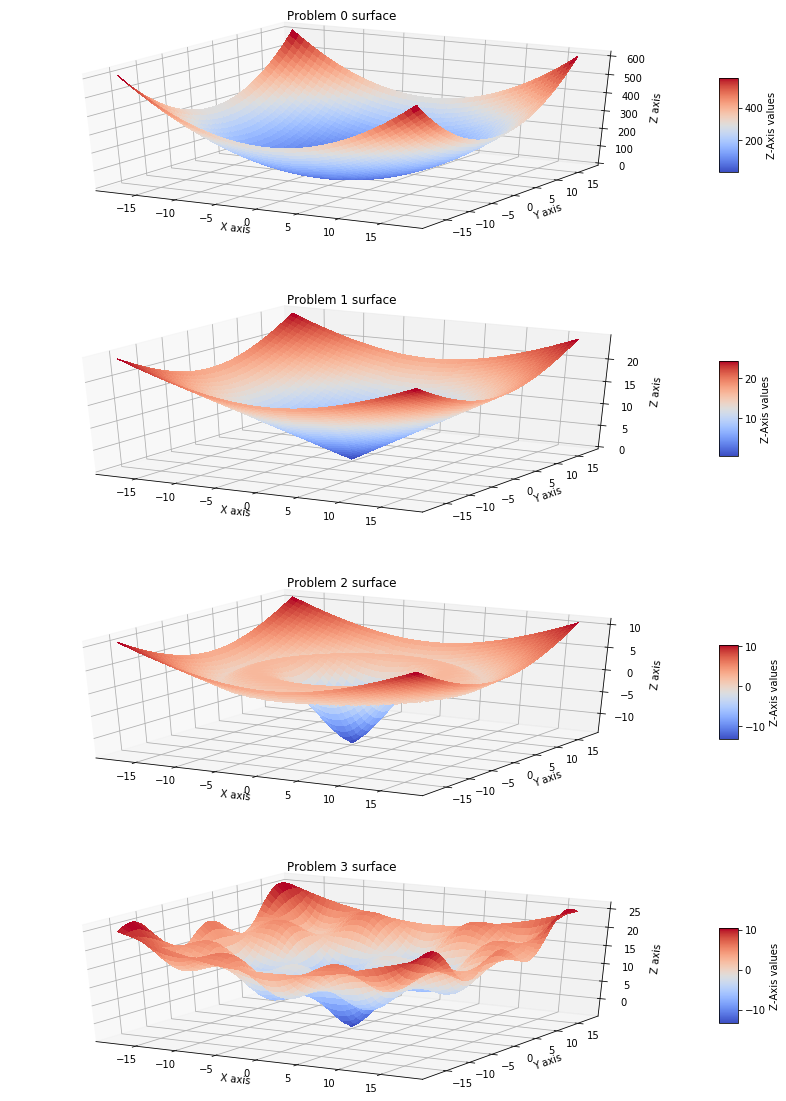

In [3]:
# Plot some nice plots for everyone to see
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

# how many steps and at what resolution do I want to plot
steps = 350
x = 0.1*np.arange(-steps/2, steps/2)
y = 0.1*np.arange(-steps/2, steps/2)
X, Y = np.meshgrid(x, y)

# defining the figure parameters
fig = plt.figure(figsize=(15,20))

# first subplot of four
ax1 = fig.add_subplot(411, projection='3d')
surf1 = ax1.plot_surface(X, Y, toy_problem_0(x, y),
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.set_title('Problem 0 surface')
fig.colorbar(surf1, shrink=0.4, aspect=5, label='Z-Axis values')

# second subplot of four
ax2 = fig.add_subplot(412, projection='3d')
surf2 = ax2.plot_surface(X, Y, toy_problem_1(x, y),
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
fig.colorbar(surf2,  shrink=0.4, aspect=5, label='Z-Axis values')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.set_title('Problem 1 surface')

# third subplot of four
ax3 = fig.add_subplot(413, projection='3d')
surf3 = ax3.plot_surface(X, Y, toy_problem_2(x, y),
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
fig.colorbar(surf3, shrink=0.4, aspect=5, label='Z-Axis values')
ax3.set_xlabel('X axis')
ax3.set_ylabel('Y axis')
ax3.set_zlabel('Z axis')
ax3.set_title('Problem 2 surface')

# fourth subplot of four
ax4 = fig.add_subplot(414, projection='3d')
surf4 = ax4.plot_surface(X, Y, toy_problem_3(x, y),
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
fig.colorbar(surf3, shrink=0.4, aspect=5, label='Z-Axis values')
ax4.set_xlabel('X axis')
ax4.set_ylabel('Y axis')
ax4.set_zlabel('Z axis')
ax4.set_title('Problem 3 surface')

# and show plots
plt.show()

<h2> Task 1, Random Search: </h2>
<ul>
    *In Task 1, you are to implement a random search method as an optimizer, and then test it on the toy problems from Task 0. The initialization point for the method is to be set to (x,y)=(13,17).*  <br/>
    Task 1 holds 33 (+3) points overall. <br/>
    
<li> **T1Q1, 10 Points**: Explain in CONCISELY. <br/>
    <ul>
    <li> How does a random search work? <br/> </li>
    <li> How would you go about implementing a random search in code? <br/> </li>
    <li> In context of the 4 toy-problems from Task0, what issues and what benefits do you expect when using random search?) <br/> </li> </ul>
    </li>
<li>**T1Q2, 10 Points**: Implement this method as a python function so that it is compatible with the supplied toy-problems from Task0! </li>
<li>**T1Q3, 13 Points**: Test the function on the toy-problems, take a critical look at how the function performs at finding the minimum at (0,0) for all four problems. How does that differ from what you expected and why? </li>
<li>**BONUS, up to 3 Points**: Plot useful, insight generating figures. </li>
</ul>

**T1Q1 Solution :**

**1. How does a random search work?**

Random Search uses a random or stochastic parameter search technique to obtain approximate solutions quickly and easily. This is achieved by iteratively moving to better positions in the search space, which are sampled from a hypersphere surrounding the current position. The goal of this method is to find ‘x’ which minimizes function ‘f’. The first step in the algorithm is to initialize ‘x’ with a random position the search space. Secondly, it samples a new position ‘y’ and compare the function evaluated to x to the function evaluated to y. if the later is greater, the algorithm moves to a new position by updating the value of x with the new value y. This step is performed repeatedly until a termination criterion is met, then x would be holding the best position [1].

**2. How would you go about implementing a random search in code?**

In code, we pick our function to optimize, specify a number of different types of parameter distribution to search through, and the number of iterations. Based of the objective function, we chose the number of variables to be randomly initialized. Then we randomly generate a candidate point within an iterator and use it with to update the current point of ‘x’ and evaluate the objective function to these new points. Finally, we compare the value of the function at the new point to the value of it at the current point and set ‘x’ to the new best point if the value of the function evaluated at the new candidate point is smaller.

**3. In context of the 4 toy-problems from Task0, what issues and what benefits do you expect when using random search?)**

Random search is proven to be efficient for large dimensional quadratic programs [1]. Therefore, the benefit is that it won’t break down for these problems. Random search uses function values, it scatters the points uniformly over the feasible region. So, it’s hard to get draw correlations and have a structured analysis since we will be trying points in random. For a problem like 4 for example, this could be extra expensive.

Reference [1](https://www.springer.com/gp/book/9781402075261)


In [12]:
# T1Q2 Solution :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def RandomSearch(func,RANGE,color):

    #initiallizing..step0
    x_0, y_0 = 13,17
    z_0 = func(x_0,y_0)
    
    #for plotting
    x_list , y_list , z = [] , [] , []
    
    #Step1,2,3..
    for _ in range(RANGE):
        k1 , k2 = np.random.uniform(-1,1, size = 2)
        x_new = x_0 + k1
        y_new = y_0 + k2
        z_new = func(x_new , y_new)
        x_list.append(x_new)
        y_list.append(y_new)
        z.append(z_new)
        if z_new < z_0:
            z_0 = z_new
            x_0,y_0 = x_new,y_new
        
            
    print(f"The minimum of '{func.__name__}' is {z_0} at ({x_0},{y_0})")
    
    #plotting
    Df = pd.concat([pd.DataFrame(x_list),pd.DataFrame(y_list),pd.DataFrame(z)] , axis = 1)
    Df.columns=["x","y","z"]    
    plt.plot(Df["z"],color=f'{color}')
    plt.xlabel('Range of Values')
    plt.ylabel('optimization Result')
    plt.title(f'{func.__name__}')
    plt.grid(linewidth = "0.4")
    plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=1.0)


Theresult of appling the method on toy_problem_0 and it's plot:

The minimum of 'toy_problem_0' is 0.0004894025952208803 at (0.020286458260984075,0.008823956394170995)


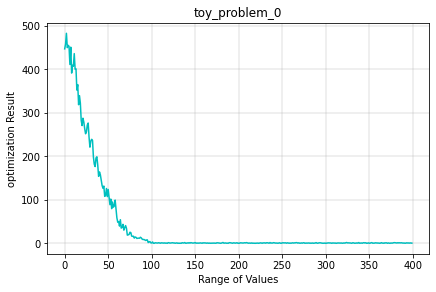

In [13]:
# T1Q3 Solution A:
print("Theresult of appling the method on toy_problem_0 and it's plot:")
print()
RandomSearch(toy_problem_0,400,color='c')

Theresult of applying the method on toy_problem_1 and it's plot:

The minimum of 'toy_problem_1' is 0.07901038728659038 at (-0.07823875057590302,0.011015407731838067)


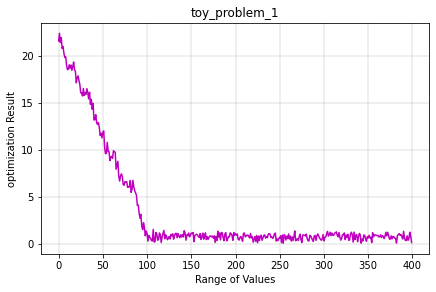

In [14]:
# T1Q3 Solution B:
print("Theresult of applying the method on toy_problem_1 and it's plot:")
print()
RandomSearch(toy_problem_1,400,color='m')

Theresult of applying the method on toy_problem_2 and it's plot:

The minimum of 'toy_problem_2' is 0.0006169477906379228 at (6.614217283141552,12.297337403191186)


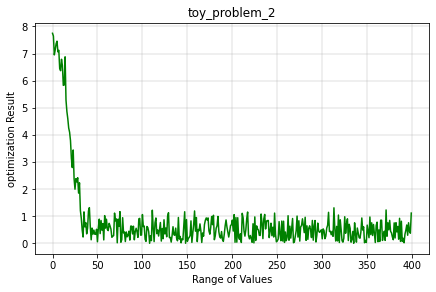

In [15]:
# T1Q3 Solution C:
print("Theresult of applying the method on toy_problem_2 and it's plot:")
print()
RandomSearch(toy_problem_2,400,color='g')

Theresult of applying the method on toy_problem_3 and it's plot:

The minimum of 'toy_problem_3' is 13.811102334365055 at (13.092069393857969,11.85952612828756)


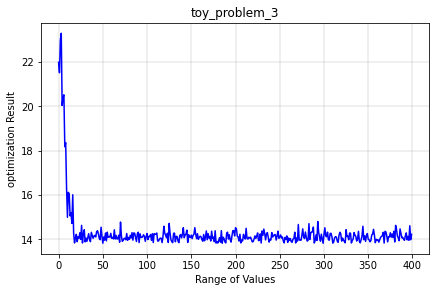

In [19]:
# T1Q3 Solution D:
print("Theresult of applying the method on toy_problem_3 and it's plot:")
print()
RandomSearch(toy_problem_3,400,color='b')

**Take a critical look at how the function performs at finding the minimum at (0,0) for all four problems. How does that differ from what you expected and why?**

- Answer:
The function perfomrs in an acceptable manner af finding values that are extreamly close to the minimum value. This is not surprising since the selection happens randomly covering a wide area of the search space. This method relies on randomness. Therefore, there are less chances that it would get stuck at a local minima. So the results here came out as I expected them to.

<h2> Task 2, Gradient Descend: </h2>
<ul>
    *In Task 2, you are to implement a gradient descend (or steepest descend) method as an optimizer, and then test it on the toy problems from Task 0. The initialization point for the method is to be set to (x,y)=(13,17). * <br/>
    Task 2 holds 33 (+3) points overall. <br/>
    
<li>**T2Q1, 10 Points**: Explain in words, concisely. <br/>
    <ul><li> How does a gradient based / first-order search work? <br/> </li>
    <li> How would you go about implementing gradient descend (or steepest descend) search in code? <br/> </li>
    <li> In context of the 4 toy-problems from Task0, what issues and what benefits do you expect when using gradient decent? <br/> </li> </ul> </li>

<li>**T2Q2, 10 Points**: Implement this method as a python function so that it is compatible with the supplied toy-problems from Task0! </li>
<li>**T2Q3, 13 Points**: Test the function on the toy-problems, take a critical look at how the function performs at finding the minimum at (0,0) for all four problems. How does that differ from what you expected and why? </li>
<li>**BONUS, up to 3 Points**: Plot useful, insight generating figures. </li>
</ul>

<h3> TIPs: </h3>
<ul>
    It might be useful to read up on gradient approximation, or refresh the relevant lin.alg or just have a good memory and still know :-) 
     </ul> 

**T1Q1 Solution :**

**1. How does a gradient based / first-order search work?**

gradient based method uses derivatives to find the optimum value of a function in three main steps. In the first step the algorithm choses the search direction by evaluating the gradient of the functin at the current position which is any random point. In the second step, This gradient is then applied on a loss function to pic the direction to go, this direction is the search direction. The next step is deciding how far to go in a chosen direction. For this step, the algorithm calculates a step size. The method them moves in that direction and checks if it has reached the minimum yet. if the calculated step size was far from zero, the algorithm learns that it's still far from the minimum. The step size is then used to update the starting point with the poin it stoped at, then use this point to calculate the slope again and then finds a new search direction and a new step size. This continues untill the last step, convergence check. which is when the algorithm check if it has reached the minimum.


**2. How would you go about implementing gradient descend (or steepest descend) search in code?**

In code I will first find out the gradient of the function then initialize our parameters that match the algorithm. parameters are the initial point, the learning rate of min 0.001 or smaller-I'll change it as it fit-, the maximum number of iterations and a precision rate as stop criterion. 
Then we iterate a number of chosen times to find new predicted points and find a step size based on the gradient and the learning rate. the algorithm should stop when the difference between the current position and the previous position on the search is less than the precision rate which should be a very small number. we should also insure that we do not exceed the number of maximum iterations which is 1000 or greater. I'm going to use 'numdifftools' library to find the gradient.


**3. In context of the 4 toy-problems from Task0, what issues and what benefits do you expect when using gradient decent?**

In gradient descent I expect the algorithm to be relatively slow in converging to the local minimum, especially for the more complex ones 2 & 3. To add to that, when there are multiple local minima like in problems 1,2,3 we can expect that there will be no global minima unless we use the sum of squares errors for such problems. On the other hand, some benifits we can expect would be the low computational demands. Which means we can find the global minima with very few calculations. We can also expect from the nature of this method to get a nice convergence theory. Moreover, this method is guaranteed to find the minimum through numerous times of iterations as long as it exists.


In [3]:
from numpy.linalg import norm
import numpy as np
import numdifftools as nd
import pandas as pd
import matplotlib.pyplot as plt

def problem(choice,x):
    
    if choice ==0:
        obj_func = toy_problem_0(x[0],x[1])
    elif choice==1:
        obj_func = toy_problem_1(x[0],x[1])
    elif choice==2:
        obj_func = toy_problem_2(x[0],x[1])
    elif choice==3:
        obj_func = toy_problem_3(x[0],x[1])
    return obj_func

In [4]:
def gradient(choice,x):
    if choice ==0:
        gx = nd.Gradient(toy_problem_0)(x,x)
    elif choice ==1:
        gx = nd.Gradient(toy_problem_1)(x,x)
    elif choice ==2:
        gx = nd.Gradient(toy_problem_2)(x,x)
    elif choice ==3:
        gx = nd.Gradient(toy_problem_3)(x,x)
    return gx[0][0]

In [6]:
# T2Q2 Answer :

def gradient_descent(choice, f, gxy, init_point, rate,color):
    
    x, z = [] , []
    precision = 0.0000001
    step_size = 1
    iterations = 10000
    counter = 0
    
    while step_size > precision and counter < iterations:
        previous_point = init_point.copy()
        init_point -= np.dot(rate , gxy(choice,init_point) )
        step_size = norm(init_point - previous_point)
        z.append(f(choice,init_point))
        x.append(init_point)
        counter += 1
    print()
    print(f"- The minimum point of {f.__name__}_{choice} is at: {init_point} at iteration no.{counter}")
    print(f"- The value is :{f(choice,init_point)}")
    
     #plotting:
    Df = pd.concat([pd.DataFrame(x),pd.DataFrame(z)] , axis = 1)
    Df.columns=["x","y","z"]    
    plt.plot(Df["z"], color=f'{color}')
    plt.title(f'{f.__name__}_{choice}')
    plt.xlabel('Iterations')
    plt.ylabel('Optimization Value')
    plt.grid(linewidth = "0.5")
    plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=1.0)


- The minimum point of problem_0 is at: [3.41586046e-06 4.00000342e+00] at iteration no.750
- The value is :16.000027326907187


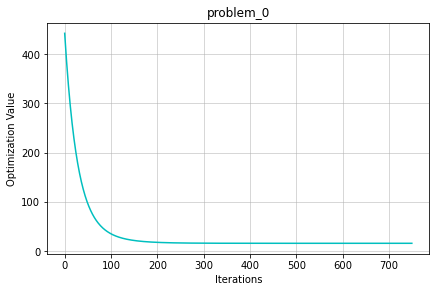

In [7]:
# T2Q3 - A
#for toy_problem_0:
#=================

gradient_descent(0,problem, gradient, np.array([13.0,17.0]),.01, color='c')


- The minimum point of problem_1 is at: [3.37736165e-03 9.26452183e+00] at iteration no.10000
- The value is :9.264522442469799


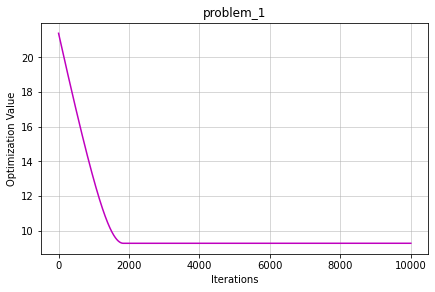

In [8]:
# T2Q3 - B
#for toy_problem_1:
#=================

gradient_descent(1,problem, gradient, np.array([13.0,17.0]),.01, color='m')


- The minimum point of problem_2 is at: [9.87307083 9.87307083] at iteration no.10000
- The value is :3.3459575252682797e-06


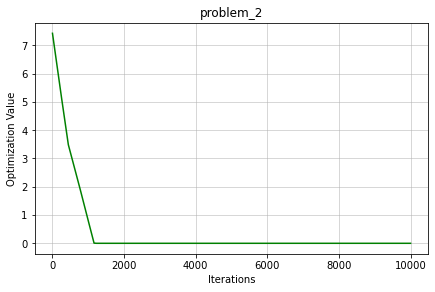

In [9]:
# T2Q3 - C
#for toy_problem_2:
#=================

gradient_descent(2,problem, gradient, np.array([13.0,17.0]),.01, color='g')


- The minimum point of problem_3 is at: [13.12556181 13.12598823] at iteration no.10000
- The value is :14.59053789450141


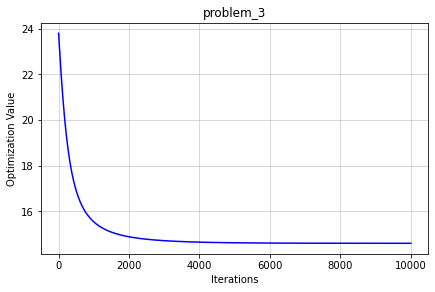

In [10]:
# T2Q3 - D
#for toy_problem_3:
#=================

gradient_descent(3,problem, gradient, np.array([13.0,17.0]),.01, color='b')

**Take a critical look at how the function performs at finding the minimum at (0,0) for all four problems. How does that differ from what you expected and why?**

Answer: This method is highly dependent on the gradient. It could converge to zero in case of problem 0 very easily and fairly easily in case of problem 1. However, for problem 2 and 3 this was not the case since they are multivariant functions. Which was expected, the points found were a local minima although the parameters were chosen carefully. This is basically dependant on the chosen starting point. So the results were expected.

### <h2> Task 3, Method 3 </h2>
<ul>
    *In Task 3, you are to implement Newton-Raphson method as an optimizer, and then test it on the toy problems from Task 0. The initialization point for the method is to be set to (x,y)=(13,17). * <br/>
    Task 3 holds 33 (+7) points overall. <br/>
<li>**T3Q1, 10 Points**: Explain in words, concisely. <br/>
    <ul><li> How does Newton-Raphson search work? <br/> </li>
    <li> How would you go about implementing Newton-Raphson search in code? <br/> </li>
    <li> In context of the 4 toy-problems from Task0, what issues and what benefits do you expect when using Newton-Raphson? <br/> </li> </ul> </li>
<li>**T3Q2, 10 Points**: Implement this method as a python function so that it is compatible with the supplied toy-problems from Task0! </li>
<li>**T3Q3, 13 Points**: Test the function on the toy-problems, take a critical look at how the function performs at finding the minimum at (0,0) for all four problems. How does that differ from what you expected and why? </li>
<li>**BONUS, up to 3 Points**: Plot useful, insight generating figures. </li>
   </ul> 
   
<h3> TIPs: </h3>
<ul>
    <li> It is very likely that you'll have to somewhat creatively re-use the derivation method you chose to use in Task2 <br/> </li>
    <li> If you happen to have to need to invert some type of matrix, I'd prefer numpy.linalg.pinv OVER numpy.linalg.inv or other more stable solutions. <br/> </li>
    <li> Depending on implementation, this method might be sensitive to hyperparameters and exhibit somewhat erratic behavior, use your plots and other analysis tools for tuning and analysis :-) <br/> </li>
     </ul> 

**T1Q1 Solution :**

**1. How does Newton-Raphson search work?**

Netwon-Raphson's method tries to find the root of a differentiable function at some point with the use of the first and secod order derivatives of that fucntion iteratively. It creates new sequence of points ex:(Xi) from an initial point ex: (x_init) by iteratively aplying the second order taylor approximation of that function. It achieves the minimum point at: (-(f'/f")) where f' is the gradient of the function and f" is the hessian.


**2. How would you go about implementing Newton-Raphson search in code?**

First I will find both the gradient and the hessian of the function at an initial point. I will use the gradient from the previous question then and apply them to find new points as follows: Xi+1 = Xi - (f"(Xi)^-1*f'(Xi)).I will also be experementing with a new gradient functions called grdient_1. Then I will update the value of the function at the initial point with the value of the function at the new point. I will always check that H(x)>0 and make adjustment to the hessien and gradient by a rating factor as needed for each problem.


**3. In context of the 4 toy-problems from Task0, what issues and what benefits do you expect when using Newton-Raphson?**

In comparison to the last method, I expect this one to be faster when it convergs to the root since it uses a quadretic approximation. For problem_0 the method does well in finding the minimum. However, for problems 1,2,3 the hessian matrix became unstable so the method was not able to do more iterations.



In [5]:
from numpy.linalg import norm
import numpy as np
import numdifftools as nd
import pandas as pd
import matplotlib.pyplot as plt

def problem(choice,x):
    
    if choice ==0:
        obj_func = toy_problem_0(x[0],x[1])
    elif choice==1:
        obj_func = toy_problem_1(x[0],x[1])
    elif choice==2:
        obj_func = toy_problem_2(x[0],x[1])
    elif choice==3:
        obj_func = toy_problem_3(x[0],x[1])
    return obj_func

def gradient_1(choice,x):
    h = 0.001
    if choice ==0:
        g_x = (toy_problem_0(x[0]+h, x[1])-toy_problem_0(x[0]-h, x[1]))/(2*h)
        g_y = (toy_problem_0(x[0], x[1]+h)-toy_problem_0(x[0], x[1]-h))/(2*h)
    elif choice ==1:
        g_x = (toy_problem_1(x[0]+h, x[1])-toy_problem_1(x[0]-h, x[1]))/(2*h)
        g_y = (toy_problem_1(x[0], x[1]+h)-toy_problem_1(x[0], x[1]-h))/(2*h)
    elif choice ==2:
        g_x = (toy_problem_2(x[0]+h, x[1])-toy_problem_2(x[0]-h, x[1]))/(2*h)
        g_y = (toy_problem_2(x[0], x[1]+h)-toy_problem_2(x[0], x[1]-h))/(2*h)
    elif choice ==3:
        g_x = (toy_problem_3(x[0]+h, x[1])-toy_problem_3(x[0]-h, x[1]))/(2*h)
        g_y = (toy_problem_3(x[0], x[1]+h)-toy_problem_3(x[0], x[1]-h))/(2*h)
    return np.array([g_x, g_y])

In [6]:
#test gradient for problem 0 at point(2,2):
gradient_1(0,[2,2])

array([4., 4.])

In [7]:
def hessian(choice,x):
    return nd.Hessian(lambda x: problem(choice,(x[0],x[1])))([x[0], x[0]])

In [8]:
#test hessian for problem 0 at point (2,2):
hessian(0,[2,2])

array([[2.00000000e+00, 1.04776726e-14],
       [1.04776726e-14, 2.00000000e+00]])

In [9]:
# T3Q2 Answer:
import numpy.linalg as la
import pandas as pd


def newton(choice, f, Df,Dff, start_point):

    z = []
    tolerence = 0.00001
    iterations = 100
    counter = 0
    step_size = 1
    
    #la.solve(Dff(choice,old_point), Df(choice,old_point))
    
    while step_size > tolerence and counter < iterations:
        
        if choice ==0:
            new_point = start_point - np.dot(np.linalg.pinv(0.04*Dff(choice,start_point)) , Df(choice,start_point))
        elif choice ==1 or choice ==2:
            new_point = start_point - np.dot(np.linalg.pinv(0.0001*Dff(choice,start_point)) , (0.0001*Df(choice,start_point)))
        else:
            new_point = start_point - np.dot(np.linalg.pinv(Dff(choice,start_point)) , Df(choice,start_point))
        start_point = new_point
        new_f =  f(choice,new_point)
        step_size = norm(new_f)
        counter+=1
        z.append(f(choice,new_point))
        
        if np.linalg.eig(Dff(choice,start_point)) == False:
            break
      
    print(f"value is: {new_f}, at: {new_point}")


In [10]:
# T3Q3 Answer A:
#===============
newton(0,problem,gradient, hessian,np.array([13.,17.]))

value is: 1.240890964360403e+19, at: [2.49087431e+09 2.49087431e+09]


In [11]:
# T3Q3 Answer B:
#===============

newton(1,problem,gradient, hessian,np.array([13.0,17.0]))

value is: 2.3611443091507587e+21, at: [-1.66958113e+21 -1.66958117e+21]


In [12]:
# T3Q3 Answer C:
#===============

newton(2,problem,gradient, hessian,np.array([13.0,17.0]))

value is: 2.3611443091507587e+21, at: [-1.66958113e+21 -1.66958117e+21]


In [13]:
# T3Q3 Answer D:
#===============

newton(3,problem,gradient, hessian,np.array([13.0,17.0]))

value is: 14.590225107820814, at: [13.12556308 13.12574342]


**Take a critical look at how the function performs at finding the minimum at (0,0) for all four problems. How does that differ from what you expected and why?**

Answer: 
the function used did good at finding the minimum for toy problem 3 where some adjustment to the hessien and gradient needed to be made for other problems. the hessian method used was calculating the hessian numerically using python (numdifftools) so it was always accurate. However, for some type of problems it needs to be adjusted by a rate which was done here. I expected problem 0 to get to the abosulote minimum 0 at 0,0 but i believe parameter tuning should be made.